In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob

c:\Users\chari\miniconda3\envs\mude\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#water_volume = xr.open_mfdataset(r'240620.IWV.NC')
lwp = xr.open_mfdataset(r'LWP/*.NC')
temp_prof = xr.open_mfdataset(r'TPC/*.NC')
spc = xr.open_mfdataset(r'SPC/*.NC')
#tbp = xr.open_mfdataset(r'C:\Users\chari\Downloads\240620.TPB.NC')
#blh = xr.open_mfdataset(r'BLH/*.NC')
hpc = xr.open_mfdataset(r'HPC/*.NC')
met = xr.open_mfdataset(r'MET/*.NC')



c:\Users\chari\miniconda3\envs\mude\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [6]:
files = glob.glob('BLH/*.NC')

# Define a function to sort the dataset by time
def preprocess(ds):
    return ds.sortby('time')

# Open multiple files and apply preprocessing
blh = xr.open_mfdataset(files, preprocess=preprocess)

In [13]:
altitude = temp_prof.altitude.values

<xarray.Dataset>
Dimensions:           (time: 3782, altitude_layer: 93)
Coordinates:
  * time              (time) datetime64[ns] 2024-06-17T22:03:11 ... 2024-06-2...
Dimensions without coordinates: altitude_layer
Data variables: (12/14)
    file_code         (time) int32 -2147483647 -2147483647 ... -2147483647
    Rad_ID            (time) int32 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3
    RSFactor          (time) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    integration_time  (time) int32 60 60 60 60 60 60 60 ... 60 60 60 60 60 60 60
    retrieval         (time) int32 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2
    RF                (time) int32 dask.array<chunksize=(97,), meta=np.ndarray>
    ...                ...
    azimuth           (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    right_ascension   (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    declination       (time) float32 dask.array<chunksize=(97,), meta=np.ndarray>
    min_T             (time) float32 221.0 221.0 221.0 ... 225.7 225.7 225.7
    max_T             (time) float32 287.9 287.9 287.9 ... 287.9 287.9 287.9
    T_prof            (time, altitude_layer) float32 dask.array<chunksize=(97, 93), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

**Temperature Profiles**

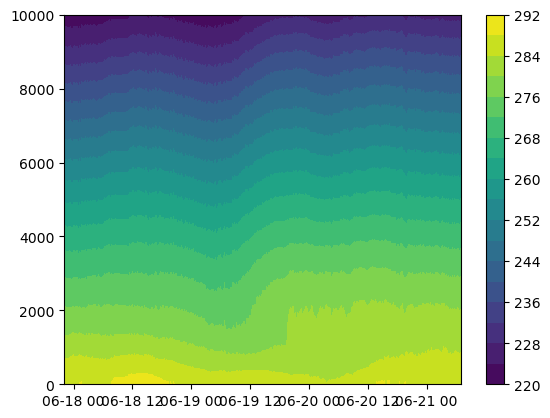

In [37]:
plt.contourf(temp_prof.time,altitude[1],temp_prof.T_prof.T,levels=20)
plt.colorbar()

**Brightness Temperature Profiles**

In [28]:
spc

<xarray.Dataset>
Dimensions:     (time: 226986, number_frequencies: 109)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T06:5...
Dimensions without coordinates: number_frequencies
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    Freq        (time, number_frequencies) float32 dask.array<chunksize=(5821, 109), meta=np.ndarray>
    Min_TBs     (time, number_frequencies) float32 dask.array<chunksize=(5821, 109), meta=np.ndarray>
    Max_TBs     (time, number_frequencies) float32 dask.array<chunksize=(5821, 109), meta=np.ndarray>
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    TBs         (time, number_frequencies) float32 dask.array<chunksize=(5821, 109), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

In [32]:
frequencies = spc.Freq[0,:].values

(50.0, 70.0)

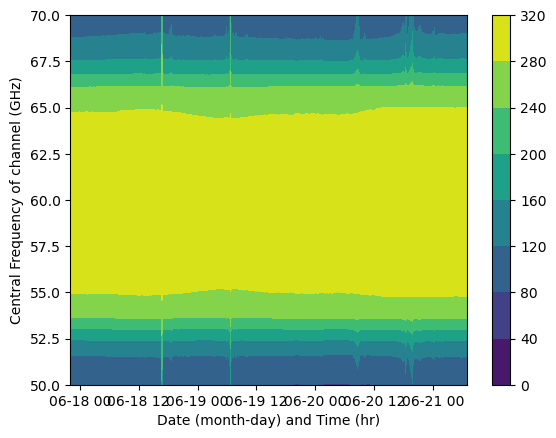

In [51]:
plt.contourf(spc.time,frequencies,spc.TBs.T)
plt.colorbar()
plt.xlabel("Date (month-day) and Time (hr)")
plt.ylabel('Central Frequency of channel (GHz)')
plt.ylim(50,70)

**Relative humidity profiles**

Text(0, 0.5, 'Altitude')

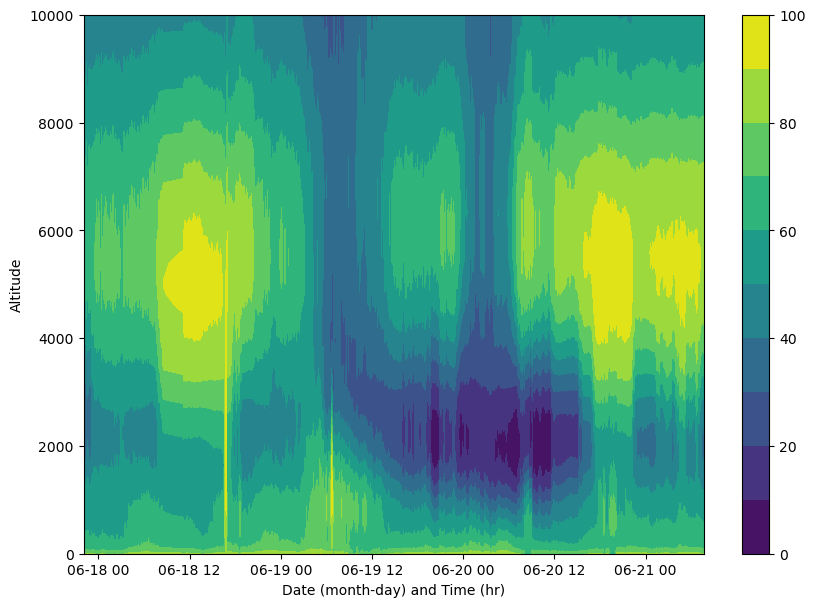

In [42]:


plt.figure(figsize=(10,7))
plt.contourf(hpc.time,altitude[1],hpc.RH_prof.T, levels =10)
#plt.ylim(0,3000)
plt.colorbar()
plt.xlabel("Date (month-day) and Time (hr)")
plt.ylabel('Altitude')


** Liquid water path profile**

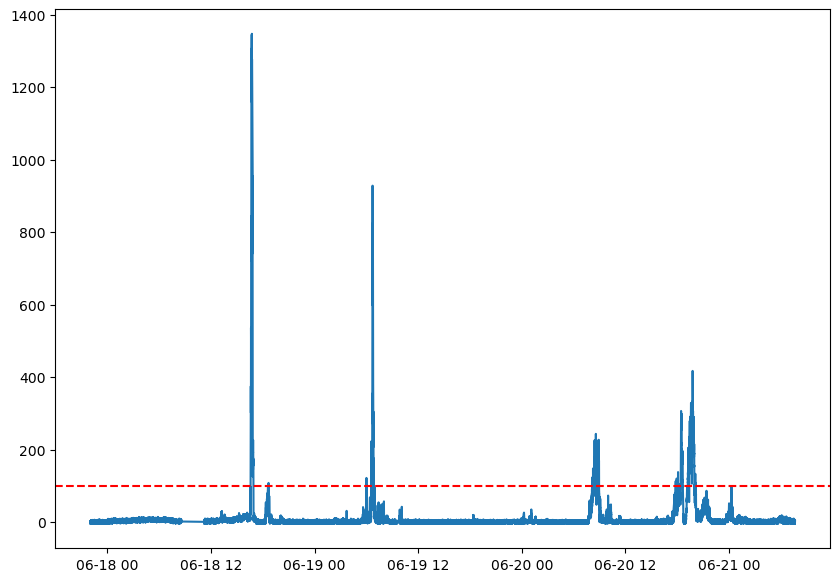

In [49]:
plt.figure(figsize=(10,7))
plt.plot(lwp.time,lwp.LWP)
plt.axhline(100,color='red',linestyle='--')




In [44]:
lwp

<xarray.Dataset>
Dimensions:     (time: 228818)
Coordinates:
  * time        (time) datetime64[ns] 2024-06-17T22:02:10 ... 2024-06-21T07:3...
Data variables:
    file_code   (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    Rad_ID      (time) int32 3 3 3 3 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3 3 3 3 3
    RSFactor    (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    IntSampCnt  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    RF          (time) int32 dask.array<chunksize=(5821,), meta=np.ndarray>
    ElAng       (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    AziAng      (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
    retrieval   (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
    Min_LWP     (time) float32 -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0
    Max_LWP     (time) float32 7.088 7.088 7.088 7.088 ... 97.89 97.89 97.89
    LWP         (time) float32 dask.array<chunksize=(5821,), meta=np.ndarray>
Attributes:
    netCDF_Convention:             CF-1.0
    Radiometer_Location:           Delft University of Technology
    Radiometer_System:             RPG-HATPRO
    Serial_Number:                 003 0139
    Station_Altitude:              -4
    Station_Longitude:             51�59'46'' WesdisoTechnolo
    Station_Latitude:              -4�22'43'' NortisoTechnolo
    Comment:                       
    Radiometer_Software_Version:  V9.59
    Host-PC_Software_Version:     V9.59

**Boundary layer height**

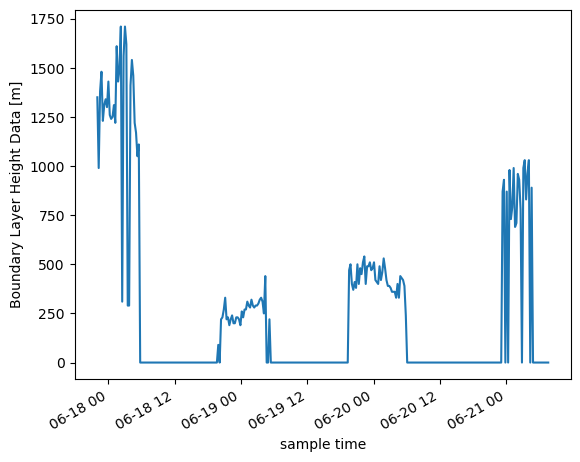

In [50]:
blh.BLH.plot()